In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### import necessary libraries

In [2]:
# Import libraries necessary for this project
import matplotlib.pyplot as plt
from IPython.display import display
import random
random.seed(42)
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
# Load the dataset
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [4]:
# Print the first few entries of the RMS Titanic data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Print test data 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## display some information about data 

In [6]:
# display some information about data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# display some statistics about data
train.describe().round(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


## Data Cleaning

In [8]:
#display null values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#display null values
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

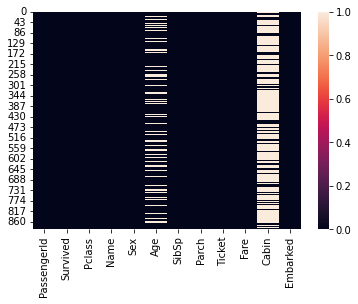

In [10]:
#chart to display null values
sns.heatmap(train.isna())

<AxesSubplot:>

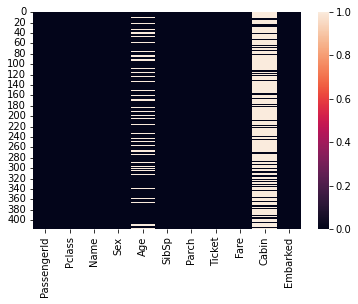

In [11]:
#chart to display null values
sns.heatmap(test.isna())

In [12]:
#fill nulls
train['Age'] = train['Age'].fillna(train['Age'].mean())

<AxesSubplot:>

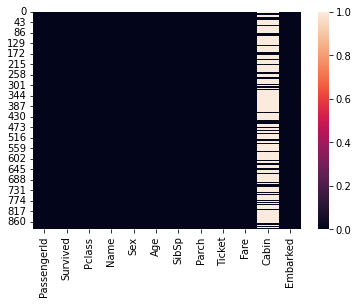

In [13]:
#chart to display null values
sns.heatmap(train.isna())

In [14]:
#fill nulls
test['Age'] = test['Age'].fillna(test['Age'].mean())

<AxesSubplot:>

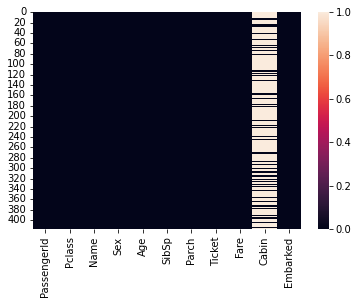

In [15]:
#chart to display null values
sns.heatmap(test.isna())

## Removing Unused columns

In [16]:
#delete unused columns
train.drop('Cabin', axis = 1 ,  inplace = True)
test.drop('Cabin', axis = 1 , inplace = True)

In [17]:
#display dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
#display dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
# display some information about data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
# display some information about data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [21]:
#delete unused columns
train.drop(['Name','Ticket'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
#delete unused columns
test.drop(['Name','Ticket'], axis = 1, inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [23]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = train['Survived']
features_raw = train.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [24]:
#make dummies values
features = pd.get_dummies(features_raw)

In [25]:
#fill nulls
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
#create dummies
X = pd.get_dummies(test)
X = X.fillna(0.0)
display(X.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [27]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [28]:
#important necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


# naive_bayes

In [29]:
# build a classifier
naive_bayes = MultinomialNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.7150837988826816


# Support Victor Machine

In [30]:
# build a classifier
model = SVC()

# Fit the model.
model.fit(X_train, y_train)
# Make predictions. 
y_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))

Accuracy score:  0.5977653631284916


# LogisticRegression

In [31]:
# Import the classifier from sklearn
from sklearn.linear_model import LogisticRegression

# build a classifier
model = LogisticRegression(max_iter = 500000)

# Fit the model.
model.fit(X_train, y_train)

# Make predictions.
y_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))

Accuracy score:  0.8044692737430168


# Decision Tree

In [32]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# build a classifier
model = DecisionTreeClassifier()

# Fit the model.
model.fit(X_train, y_train)

# Make predictions. 
y_test_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred)))

Accuracy score:  0.7653631284916201


In [33]:
# build a classifier
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)

# Fit the model.
model.fit(X_train, y_train)

# Make predictions.
y_test_pred = model.predict(X_test)

# display accuracy
print('Accuracy score: ', format(accuracy_score(y_test, y_test_pred)))

Accuracy score:  0.8268156424581006


# Ensemble Methods 

In [34]:
# Import the classifier from sklearn
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [35]:
# build a Bagging classifier 
bag_mod = BaggingClassifier(n_estimators=200)

# build a Random Forest classifier 
rf_mod = RandomForestClassifier(n_estimators=200)

# build a AdaBoost classifier 
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

In [36]:
# Fit your BaggingClassifier to the training data
bag_mod.fit(X_train, y_train)

# Fit your RandomForestClassifier to the training data
rf_mod.fit(X_train, y_train)

# Fit your AdaBoostClassifier to the training data
ada_mod.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=300)

In [37]:
# Predict using BaggingClassifier on the test data
bag_preds = bag_mod.predict(X_test) 

# Predict using RandomForestClassifier on the test data
rf_preds = rf_mod.predict(X_test)

# Predict using AdaBoostClassifier on the test data
ada_preds = ada_mod.predict(X_test)

In [38]:
print('Accuracy score: for BaggingClassifier ', format(accuracy_score(y_test, bag_preds)))

print('Accuracy score: for RandomForestClassifier ', format(accuracy_score(y_test, rf_preds)))

print('Accuracy score: for AdaBoostClassifier ', format(accuracy_score(y_test, ada_preds)))

Accuracy score: for BaggingClassifier  0.8156424581005587
Accuracy score: for RandomForestClassifier  0.8212290502793296
Accuracy score: for AdaBoostClassifier  0.8044692737430168


# Grid Search

In [39]:
# Import the classifier from sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [40]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

print('Accuracy score: for RandomForestClassifier ', format(accuracy_score(y_test, rf_preds)))

Accuracy score: for RandomForestClassifier  0.7988826815642458


In [41]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

print('Accuracy score: for AdaBoostClassifier ', format(accuracy_score(y_test, rf_preds)))

Accuracy score: for AdaBoostClassifier  0.7988826815642458
